# Business Problem
Suppose, an owner of a bike shop wants to rent bicycles to customers. Now as a Data Scientist,I want to predict the the number of requsets for bicycles by customers based on some information you have.

So I will analyze this to a kind of linear regression with multiple features.


# Source of Data and attribute desrciption

https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the Data

In [2]:
df = pd.read_csv("day.csv")

In [3]:
df1 = pd.read_csv("day.csv")

In [4]:
df2 = pd.read_csv("hour.csv")

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Descriptive Statistics

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
df2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Maping

In [12]:
df['season'] = df['season'].map({1:"Winter",2:"Spring",3:"Summer",4:"Fall"})
df['weekday'] = df['weekday'].map({0:"Saturday",1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday"})
df['mnth'] = df['mnth'].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
df['weathersit'] = df['weathersit'].map({1:"Clear",2:"Cloudy",3:"LightRain",4:"Snow_Thunderstorm"})

## Exploratory Data Analysis

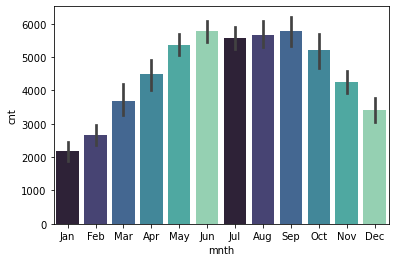

In [13]:
sns.barplot( x = "mnth"  , y = "cnt", data = df, palette=sns.color_palette("mako"))
plt.show()

Number of bike riders are high from may to october comparatively to rest of months.

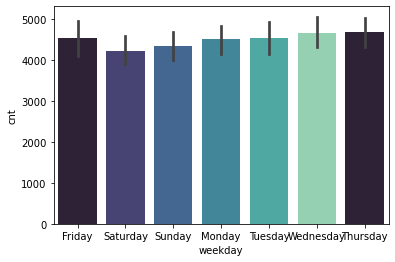

In [14]:
sns.barplot( x = "weekday"  , y = "cnt", data = df, palette=sns.color_palette("mako"))
plt.show()

There are almost same no.during the whole week little less in weekend this is due to these rides are mostly used by office going people.

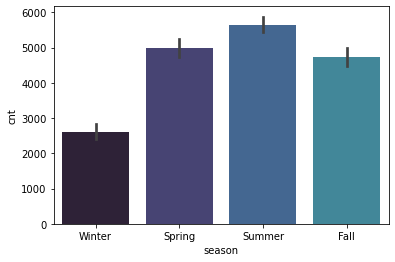

In [15]:
sns.barplot( x = "season"  , y = "cnt", data = df, palette=sns.color_palette("mako"))
plt.show()

There are comparatively more number of riders during summer than in winter. Maybe the company can provide discounts or offers during this time to encourage riders to use their bikes.

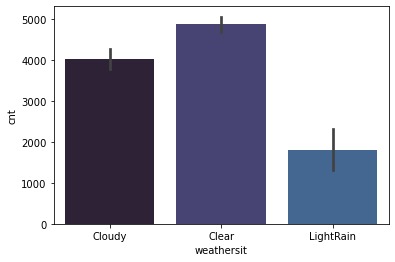

In [16]:
sns.barplot( x = "weathersit"  , y = "cnt", data = df, palette=sns.color_palette("mako"))
plt.show()

Weather conditions do play a crucial role in deciding the number of people that are going to use the bikes. During bad weather, less people are going to use it. Clear weather on the other hand attracts more people to use these bikes.

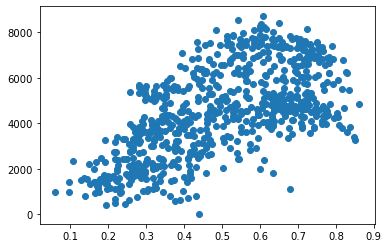

In [17]:
plt.scatter( x=df['temp'], y=df['cnt'])


Here, we can see that as the temperature increase, the count of riders also increases. A higher temperature would probably suggest a better weather condition, and hence more riders.

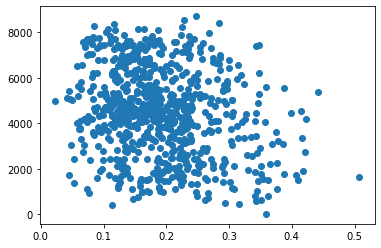

In [18]:
print(plt.scatter( x=df['windspeed'], y=df['cnt']))

As the windspeed increases, the number of riders also decreases. This is possibly due to bad weather conditions.

<AxesSubplot:>

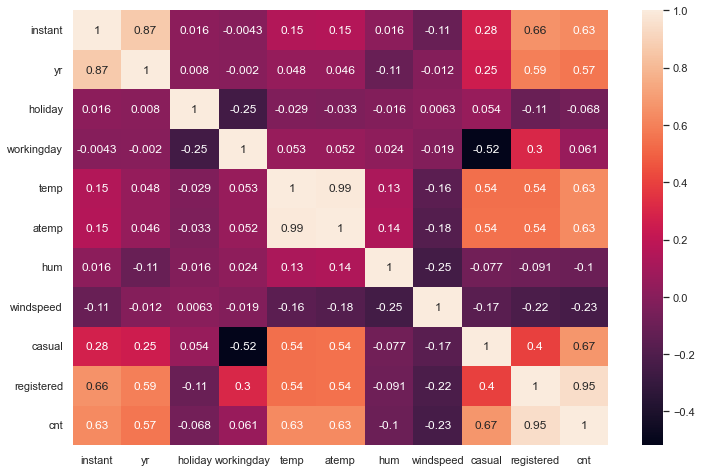

In [19]:
sns.set(rc={"figure.figsize":(12, 8)})
sns.heatmap(df.corr(),annot=True )

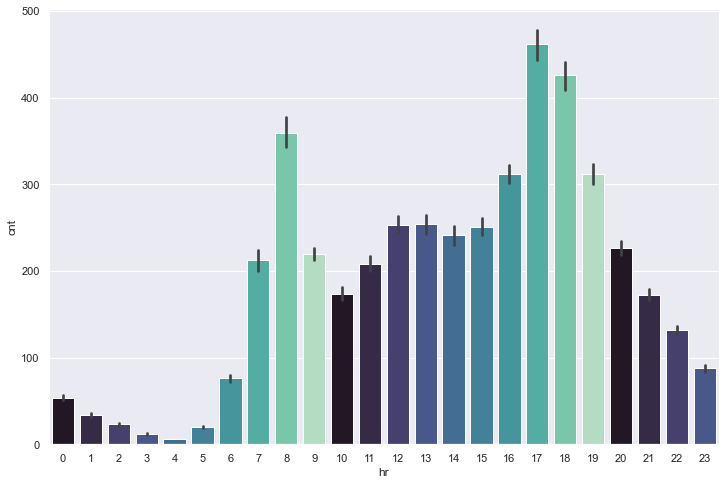

In [20]:
sns.barplot( x = "hr"  , y = "cnt", data = df2, palette=sns.color_palette("mako" , 10))
plt.show()

No. of bike riders are high during morning 7-10 AM and in evening 4-7 because this hi time when office going people goes and come back from their offices.

<AxesSubplot:xlabel='hr', ylabel='cnt'>

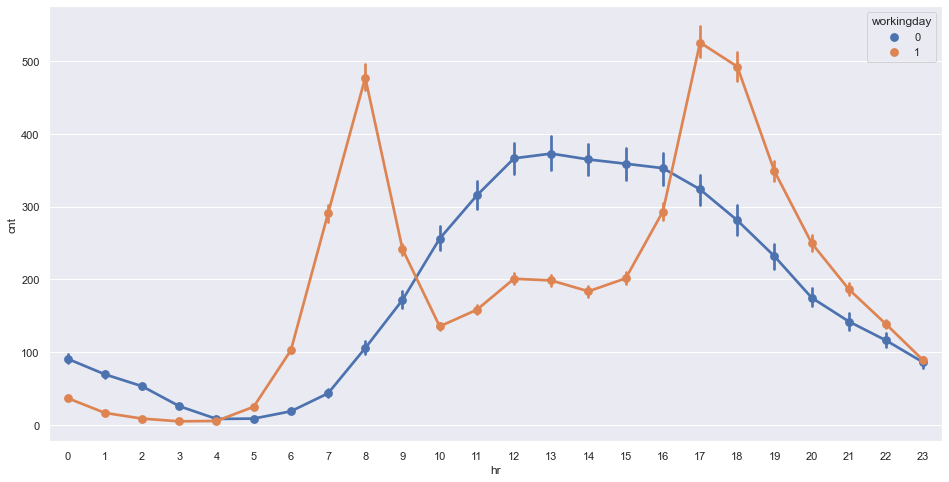

In [21]:
sns.set(rc={"figure.figsize":(16, 8)})
sns.pointplot(x=df2['hr'], y=df2['cnt'], hue=df2['workingday'])

in weekdays there is sharp demand in morning arround 8 AM and in evening arround 5-6 PM whereas in weekend the demand is highest in afternoon 1PM and there is gradual increase and decrease in demand.

In [22]:
RG=df.groupby('holiday')['registered'].sum() # 0=holiday 1= no holiday
RG

holiday
0    2616586
1      56076
Name: registered, dtype: int64

([<matplotlib.patches.Wedge at 0x224a15282e0>,
 [Text(-1.0976112513045817, 0.07245371632698286, 'holiday'),
  Text(1.0976112551203587, -0.07245365852123038, 'no_holiday')],
 [Text(-0.5986970461661354, 0.039520208905627005, '97.90%'),
  Text(0.5986970482474683, -0.03952017737521656, '2.10%')])

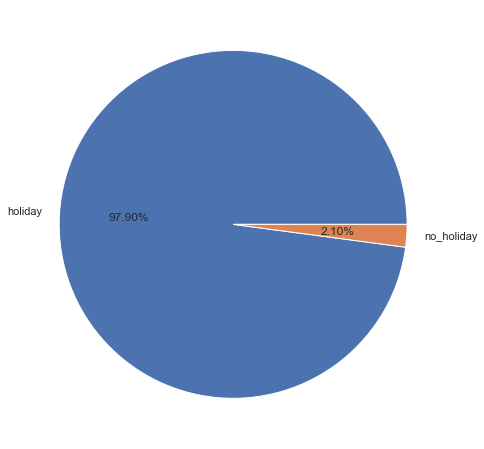

In [23]:
plt.pie(RG, labels = ['holiday' ,'no_holiday'] , autopct = '%1.2f%%')

In [24]:
df['holiday'].value_counts()

0    710
1     21
Name: holiday, dtype: int64

In [25]:
(df['weekday']).value_counts()

Friday       105
Saturday     105
Sunday       105
Monday       104
Tuesday      104
Wednesday    104
Thursday     104
Name: weekday, dtype: int64


- booking on holidays are more than on no holidays
- booking for weekdays is more than weekends so we can infer that the registered users are working/ students
- booking for weekends are more done by casual users and on weekdays we have mostly registered users. 
- temperature has a positive and moderate assosciate with count coloumn and holiday , holiday, humidity, windspeed has a negative assoscaiation.
- on average, max bike counts has been found in the season of summer and the min is in winter because winters in portugals are harsh and commuting with bike isn't feasible.
- the bike count is maximum for the month of october

<AxesSubplot:xlabel='cnt'>

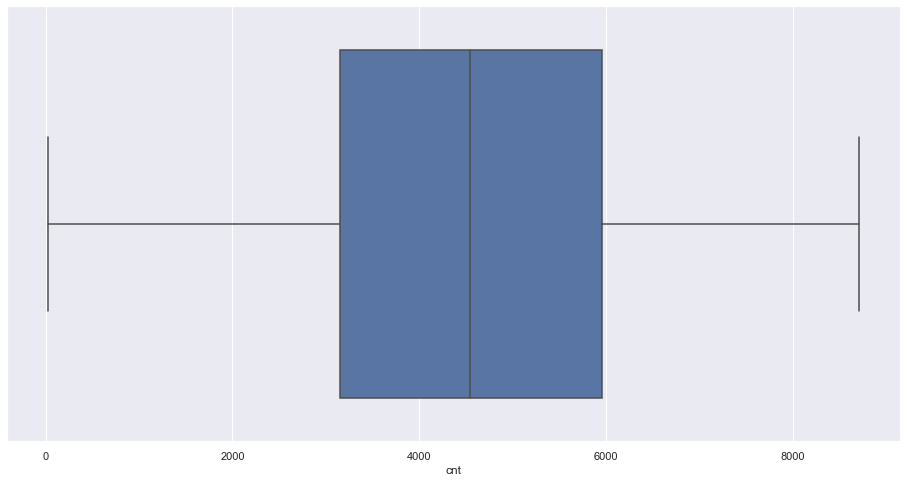

In [27]:
sns.boxplot(df['cnt'])

<AxesSubplot:xlabel='casual'>

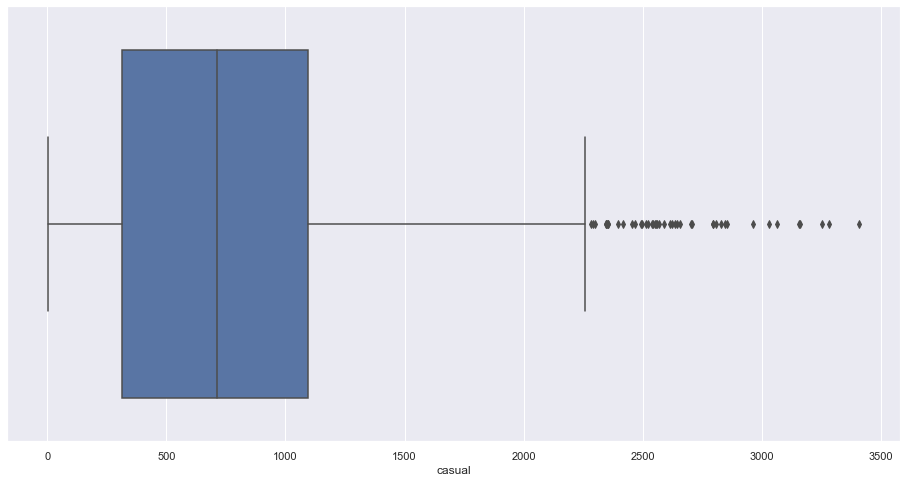

In [28]:
sns.boxplot(df['casual'])

<AxesSubplot:xlabel='registered'>

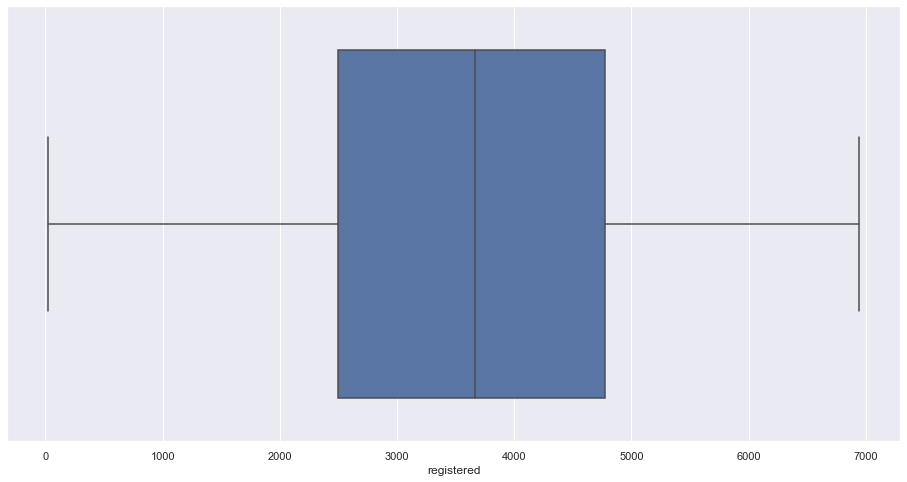

In [29]:
sns.boxplot(df['registered'])

In [30]:
df["hum"].corr(df["windspeed"])

-0.248489098643714

<AxesSubplot:xlabel='hum', ylabel='windspeed'>

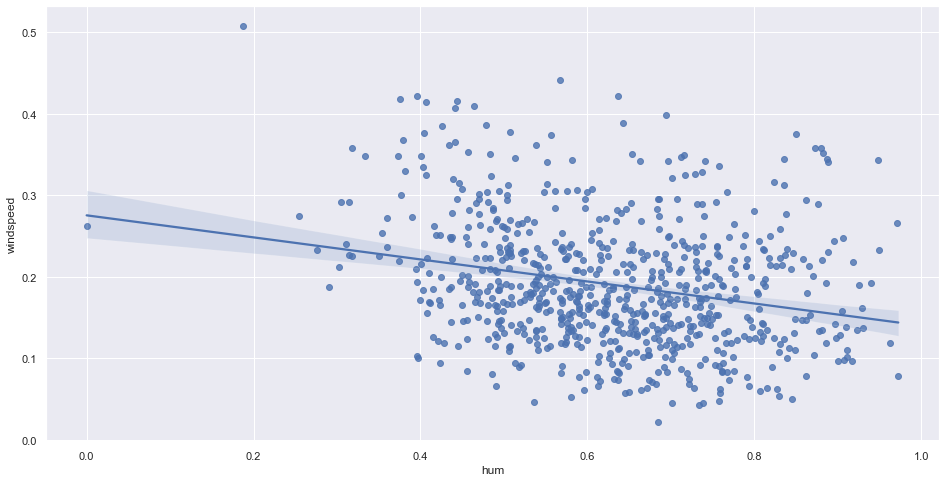

In [31]:
sns.regplot(x=df["hum"],y=df["windspeed"])

In [32]:
df["casual"].corr(df["registered"])

0.3952824508604642

<AxesSubplot:xlabel='casual', ylabel='registered'>

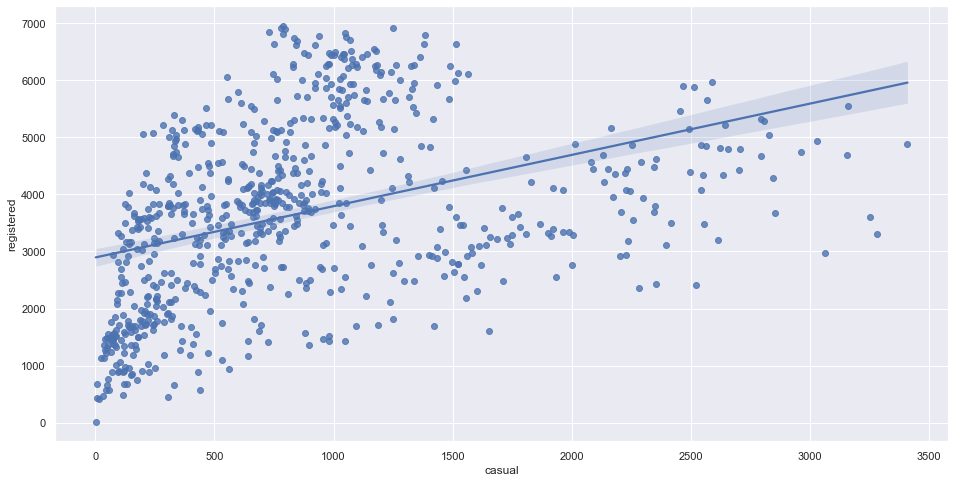

In [33]:
sns.regplot(x=df["casual"],y=df["registered"])


<AxesSubplot:xlabel='temp', ylabel='cnt'>

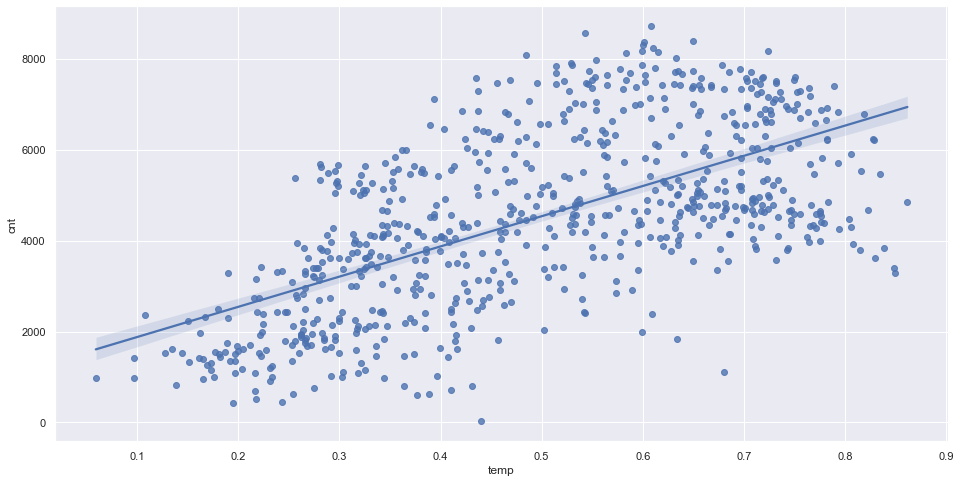

In [34]:
sns.regplot(x=df["temp"],y=df["cnt"])


<AxesSubplot:xlabel='atemp', ylabel='cnt'>

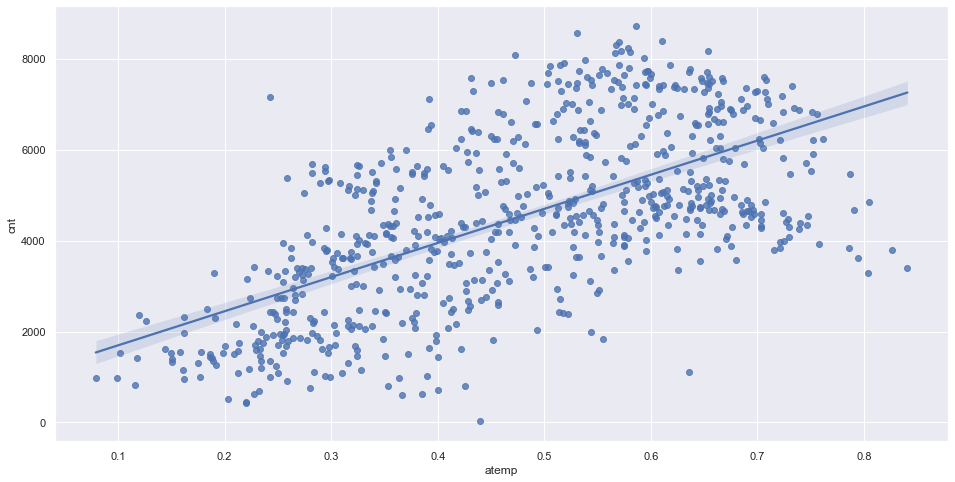

In [35]:
sns.regplot(x=df["atemp"],y=df["cnt"])

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

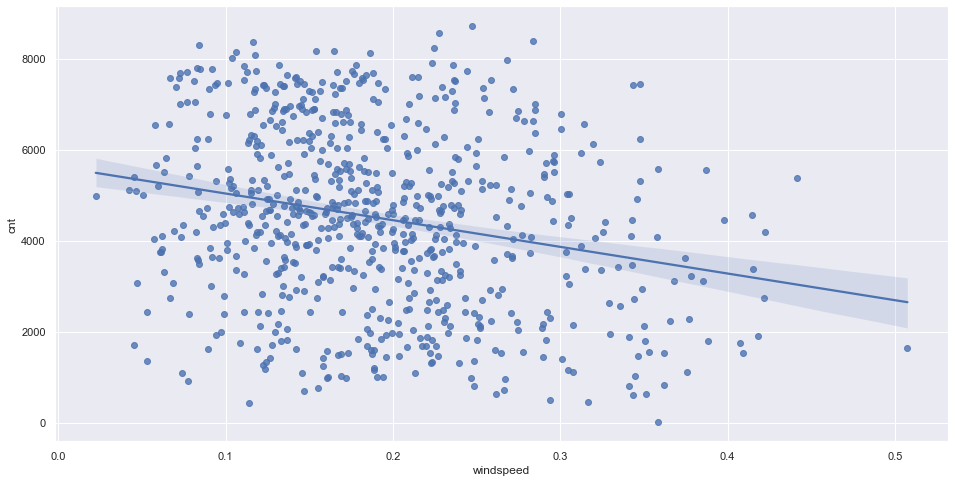

In [36]:
sns.regplot(x=df["windspeed"],y=df["cnt"])

- Temp has positive corelation with count of bicycle registered as this is colder region and as temp increases people tends to book more bicycle
- Windspeed has negetive corelation with count as windspeed increases no of count decreases
- Temp and atemp has almost similar behaviour with count so we have to drop one of them because they are also highly corelated to each other.

## Statistical Analysis

In [37]:
train_ols = df1.drop(['cnt','registered','casual','instant','dteday','yr','mnth'],axis=1)
test_ols = df1['cnt']

In [38]:
train_ols

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...
726,1,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,1,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,1,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,1,0,0,0,1,0.255833,0.231700,0.483333,0.350754


In [39]:
import statsmodels.api as sm # defining the variables
x = train_ols
y = test_ols
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     89.31
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          4.63e-111
Time:                        19:35:49   Log-Likelihood:                -6295.9
No. Observations:                 731   AIC:                         1.261e+04
Df Residuals:                     721   BIC:                         1.266e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3037.1604    360.990      8.413      0.0

In [40]:
train_ols = train_ols.drop(['holiday','workingday','temp'],axis=1)

In [41]:
import statsmodels.api as sm # defining the variables
x = train_ols
y = test_ols
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     132.5
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          6.09e-113
Time:                        19:35:49   Log-Likelihood:                -6298.9
No. Observations:                 731   AIC:                         1.261e+04
Df Residuals:                     724   BIC:                         1.264e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2962.7585    341.281      8.681      0.0

## Modelling

In [42]:
train= df1.drop(['instant','dteday','casual','registered','cnt','atemp'],axis=1)

In [43]:
test = df1['cnt']

In [44]:
test = np.log(df1['cnt'])

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train , X_test, y_train , y_test = train_test_split(train,test,test_size = 0.25, shuffle = True,random_state=100)

## Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [48]:
LR.fit(X_train,y_train)

LinearRegression()

In [49]:
R2_score = LR.score(X_test,y_test)

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
y_predict = LR.predict(X_test)

In [52]:
mse = mean_squared_error(y_predict,y_test)

In [53]:
rmse = np.sqrt(mse)

In [54]:
rmse

0.27903035482586935

In [55]:
model_results = pd.DataFrame([['Linear Regression', R2_score , rmse]],
               columns = ['Model', 'R2 Score' , 'RMSE'])
model_results

,Model,R2 Score,RMSE
0,Linear Regression,0.726425,0.27903


## Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
R2_score = RF.score(X_test,y_test)

In [59]:
y_pred = RF.predict(X_test)


In [60]:
rmse = np.sqrt(mean_squared_error(y_pred,y_test))

In [61]:
rmse

0.19174007172299015

In [62]:
rf_res = pd.DataFrame([['Random Forest', R2_score , rmse]],
               columns = ['Model', 'R2 Score' , 'RMSE'])
model_results = model_results.append(rf_res, ignore_index = True)
model_results

,Model,R2 Score,RMSE
0,Linear Regression,0.726425,0.27903
1,Random Forest,0.870819,0.19174


## XG Boost

In [63]:
from xgboost import XGBRegressor

In [64]:
XG=XGBRegressor()

In [65]:
XG.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [66]:
R2_score = XG.score(X_test,y_test)

In [67]:
y_pred_xg = XG.predict(X_test)

In [68]:
rmse = np.sqrt(mean_squared_error(y_pred_xg,y_test))

In [69]:
rmse

0.2192216130060546

In [70]:
xg_res = pd.DataFrame([['XG Boost', R2_score , rmse]],
               columns = ['Model', 'R2 Score' , 'RMSE'])
model_results = model_results.append(xg_res, ignore_index = True)
model_results

,Model,R2 Score,RMSE
0,Linear Regression,0.726425,0.279030
1,Random Forest,0.870819,0.191740
2,XG Boost,0.831135,0.219222


## Hyper Parameter Tunning

In [71]:
# param_grid = dict({'n_estimators': [100, 200, 300 , 400],
#                    'max_depth': [2, 3, 4, 5, 6, 7, 8],
#                    'max_features': ['auto', 'sqrt'],
#                    "min_samples_split" : [2, 6, 10],
#                    'criterion' :['gini', 'entropy']
#                   })

In [72]:
# from sklearn.model_selection import GridSearchCV

In [73]:
# CV_rfc = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

In [74]:
# CV_rfc.best_params_

In [75]:
RF_GCV= RandomForestRegressor(max_depth = 8,max_features='sqrt',min_samples_split = 2 , n_estimators=400)

In [76]:
RF_GCV.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=400)

In [77]:
R2_score = RF_GCV.score(X_test,y_test)

In [78]:
y_pred = RF_GCV.predict(X_test)

In [79]:
rmse = np.sqrt(mean_squared_error(y_pred,y_test))

In [80]:
rmse

0.2111966424852175

In [81]:
RFGCV_res = pd.DataFrame([['Random Forest Grid search', R2_score , rmse]],
               columns = ['Model', 'R2 Score' , 'RMSE'])
model_results = model_results.append(RFGCV_res, ignore_index = True)
model_results

,Model,R2 Score,RMSE
0,Linear Regression,0.726425,0.279030
1,Random Forest,0.870819,0.191740
2,XG Boost,0.831135,0.219222
3,Random Forest Grid search,0.843272,0.211197


Random Forest is giving us lowest RMSE and and highest R2 score. so we will go with this model to predict request for bicycles in future to improve the model performence hyperparameter optimization and and advance model can be used. 